3090 - pth-gpu, kernel died

3090 - pth25gpu - OK

Start ALL: 20:27

In [ ]:
%run main.py --dataset ALL --optimizers ALL --num_epochs 20 --num_runs 5 --batch_size 512

Using device: cuda
GPU: NVIDIA GeForce RTX 3090

=== Dataset: CIFAR100 | Noise: 0.0 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified


D:\git\mamintoosi-papers-codes\SR-Adam\training.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Optimizer: SGD

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\training.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:82: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 4.6034 | Train Acc: 1.15% | Test Loss: 4.5968 | Test Acc: 1.30% | Time: 32.14s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch 10/20 | Train Loss: 4.2026 | Train Acc: 6.29% | Test Loss: 4.1092 | Test Acc: 7.98% | Time: 33.07s


Epoch 20/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 20/20 | Train Loss: 3.8732 | Train Acc: 11.12% | Test Loss: 3.7704 | Test Acc: 13.18% | Time: 30.80s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]


Epoch 1/20 | Train Loss: 4.6027 | Train Acc: 1.04% | Test Loss: 4.5964 | Test Acc: 1.36% | Time: 31.51s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]


Epoch 10/20 | Train Loss: 4.2297 | Train Acc: 6.26% | Test Loss: 4.1240 | Test Acc: 7.81% | Time: 31.07s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]


Epoch 20/20 | Train Loss: 3.9216 | Train Acc: 10.39% | Test Loss: 3.7960 | Test Acc: 12.96% | Time: 31.78s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 1/20 | Train Loss: 4.6023 | Train Acc: 1.21% | Test Loss: 4.5953 | Test Acc: 1.70% | Time: 31.75s


Epoch 10/20: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]


Epoch 10/20 | Train Loss: 4.2353 | Train Acc: 6.08% | Test Loss: 4.1405 | Test Acc: 7.79% | Time: 30.82s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]


Epoch 20/20 | Train Loss: 3.9031 | Train Acc: 10.77% | Test Loss: 3.7882 | Test Acc: 13.04% | Time: 31.55s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]


Epoch 1/20 | Train Loss: 4.6037 | Train Acc: 1.00% | Test Loss: 4.5961 | Test Acc: 1.18% | Time: 31.70s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]


Epoch 10/20 | Train Loss: 4.2394 | Train Acc: 6.25% | Test Loss: 4.1263 | Test Acc: 8.38% | Time: 31.36s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 20/20 | Train Loss: 3.9162 | Train Acc: 10.28% | Test Loss: 3.7957 | Test Acc: 13.06% | Time: 31.49s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 1/20 | Train Loss: 4.6011 | Train Acc: 1.27% | Test Loss: 4.5939 | Test Acc: 1.55% | Time: 32.04s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]


Epoch 10/20 | Train Loss: 4.1851 | Train Acc: 6.36% | Test Loss: 4.0756 | Test Acc: 8.97% | Time: 31.94s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Epoch 20/20 | Train Loss: 3.8825 | Train Acc: 10.85% | Test Loss: 3.7660 | Test Acc: 13.59% | Time: 32.01s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\SGD\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\SGD\runs_and_aggregate.xlsx

Optimizer: Momentum

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]


Epoch 1/20 | Train Loss: 4.5503 | Train Acc: 2.06% | Test Loss: 4.3579 | Test Acc: 5.22% | Time: 31.85s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Epoch 10/20 | Train Loss: 3.2480 | Train Acc: 21.02% | Test Loss: 3.0754 | Test Acc: 24.58% | Time: 31.92s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]


Epoch 20/20 | Train Loss: 2.8080 | Train Acc: 29.44% | Test Loss: 2.5918 | Test Acc: 34.56% | Time: 31.55s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]


Epoch 1/20 | Train Loss: 4.5493 | Train Acc: 2.19% | Test Loss: 4.3799 | Test Acc: 4.38% | Time: 31.93s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]


Epoch 10/20 | Train Loss: 3.2896 | Train Acc: 20.53% | Test Loss: 3.0880 | Test Acc: 24.72% | Time: 31.60s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]


Epoch 20/20 | Train Loss: 2.8784 | Train Acc: 27.94% | Test Loss: 2.6269 | Test Acc: 33.76% | Time: 31.32s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch 1/20 | Train Loss: 4.5505 | Train Acc: 2.35% | Test Loss: 4.3821 | Test Acc: 5.02% | Time: 32.70s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]


Epoch 10/20 | Train Loss: 3.2466 | Train Acc: 20.95% | Test Loss: 3.0685 | Test Acc: 25.43% | Time: 31.55s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch 20/20 | Train Loss: 2.7910 | Train Acc: 29.88% | Test Loss: 2.5365 | Test Acc: 35.76% | Time: 32.47s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 1/20 | Train Loss: 4.5600 | Train Acc: 2.17% | Test Loss: 4.4145 | Test Acc: 4.98% | Time: 32.53s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]


Epoch 10/20 | Train Loss: 3.2508 | Train Acc: 21.42% | Test Loss: 3.0498 | Test Acc: 25.27% | Time: 31.49s


Epoch 20/20: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]


Epoch 20/20 | Train Loss: 2.8312 | Train Acc: 29.06% | Test Loss: 2.5739 | Test Acc: 34.79% | Time: 33.61s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:30<00:00,  3.27it/s]


Epoch 1/20 | Train Loss: 4.5342 | Train Acc: 2.47% | Test Loss: 4.3025 | Test Acc: 6.46% | Time: 33.25s


Epoch 10/20: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]


Epoch 10/20 | Train Loss: 3.2237 | Train Acc: 21.54% | Test Loss: 3.0116 | Test Acc: 26.50% | Time: 31.84s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 20/20 | Train Loss: 2.8210 | Train Acc: 29.03% | Test Loss: 2.5627 | Test Acc: 34.93% | Time: 32.20s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\Momentum\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\Momentum\runs_and_aggregate.xlsx

Optimizer: Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]


Epoch 1/20 | Train Loss: 4.1686 | Train Acc: 6.56% | Test Loss: 3.6941 | Test Acc: 14.38% | Time: 34.19s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch 10/20 | Train Loss: 2.7918 | Train Acc: 29.52% | Test Loss: 2.5148 | Test Acc: 35.51% | Time: 32.61s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 20/20 | Train Loss: 2.5291 | Train Acc: 34.72% | Test Loss: 2.2695 | Test Acc: 40.83% | Time: 32.06s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]


Epoch 1/20 | Train Loss: 4.1695 | Train Acc: 6.86% | Test Loss: 3.6994 | Test Acc: 13.82% | Time: 33.10s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 10/20 | Train Loss: 2.8155 | Train Acc: 29.05% | Test Loss: 2.5233 | Test Acc: 35.10% | Time: 32.49s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 20/20 | Train Loss: 2.5353 | Train Acc: 34.65% | Test Loss: 2.2842 | Test Acc: 40.64% | Time: 32.04s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Epoch 1/20 | Train Loss: 4.1577 | Train Acc: 6.89% | Test Loss: 3.7029 | Test Acc: 14.44% | Time: 32.02s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 10/20 | Train Loss: 2.7577 | Train Acc: 30.28% | Test Loss: 2.4926 | Test Acc: 36.24% | Time: 32.55s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Epoch 20/20 | Train Loss: 2.4969 | Train Acc: 35.82% | Test Loss: 2.2288 | Test Acc: 41.85% | Time: 32.06s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]


Epoch 1/20 | Train Loss: 4.1928 | Train Acc: 6.54% | Test Loss: 3.7131 | Test Acc: 14.26% | Time: 32.24s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch 10/20 | Train Loss: 2.8461 | Train Acc: 28.53% | Test Loss: 2.5472 | Test Acc: 34.97% | Time: 32.56s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 20/20 | Train Loss: 2.5810 | Train Acc: 33.67% | Test Loss: 2.3248 | Test Acc: 40.15% | Time: 32.43s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]


Epoch 1/20 | Train Loss: 4.1649 | Train Acc: 6.67% | Test Loss: 3.7260 | Test Acc: 12.75% | Time: 32.16s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 10/20 | Train Loss: 2.8117 | Train Acc: 29.06% | Test Loss: 2.5455 | Test Acc: 35.84% | Time: 32.50s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch 20/20 | Train Loss: 2.5556 | Train Acc: 34.14% | Test Loss: 2.2936 | Test Acc: 40.65% | Time: 32.58s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\Adam\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]


Epoch 1/20 | Train Loss: 4.2020 | Train Acc: 6.21% | Test Loss: 3.7495 | Test Acc: 13.35% | Time: 32.24s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch 10/20 | Train Loss: 2.6482 | Train Acc: 32.30% | Test Loss: 2.3548 | Test Acc: 38.72% | Time: 32.72s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch 20/20 | Train Loss: 2.4088 | Train Acc: 37.21% | Test Loss: 2.1845 | Test Acc: 43.20% | Time: 32.82s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]


Epoch 1/20 | Train Loss: 4.2010 | Train Acc: 6.47% | Test Loss: 3.7484 | Test Acc: 12.52% | Time: 32.55s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch 10/20 | Train Loss: 2.6950 | Train Acc: 31.36% | Test Loss: 2.4220 | Test Acc: 36.87% | Time: 32.67s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch 20/20 | Train Loss: 2.4479 | Train Acc: 36.53% | Test Loss: 2.1753 | Test Acc: 42.99% | Time: 32.83s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]


Epoch 1/20 | Train Loss: 4.1884 | Train Acc: 6.59% | Test Loss: 3.7330 | Test Acc: 13.24% | Time: 33.07s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]


Epoch 10/20 | Train Loss: 2.6218 | Train Acc: 32.96% | Test Loss: 2.3582 | Test Acc: 38.90% | Time: 32.86s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]


Epoch 20/20 | Train Loss: 2.3621 | Train Acc: 38.35% | Test Loss: 2.1292 | Test Acc: 44.13% | Time: 32.66s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch 1/20 | Train Loss: 4.2220 | Train Acc: 6.06% | Test Loss: 3.7475 | Test Acc: 13.56% | Time: 32.93s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]


Epoch 10/20 | Train Loss: 2.7513 | Train Acc: 30.17% | Test Loss: 2.4692 | Test Acc: 35.96% | Time: 32.70s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]


Epoch 20/20 | Train Loss: 2.5121 | Train Acc: 35.07% | Test Loss: 2.2423 | Test Acc: 40.83% | Time: 32.38s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


Epoch 1/20 | Train Loss: 4.1942 | Train Acc: 6.29% | Test Loss: 3.7555 | Test Acc: 13.01% | Time: 32.05s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]


Epoch 10/20 | Train Loss: 2.7014 | Train Acc: 31.28% | Test Loss: 2.4258 | Test Acc: 37.93% | Time: 32.35s


Epoch 20/20: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]


Epoch 20/20 | Train Loss: 2.4478 | Train Acc: 36.29% | Test Loss: 2.1929 | Test Acc: 42.54% | Time: 31.99s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.0\SR-Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.0\SR-Adam\runs_and_aggregate.xlsx


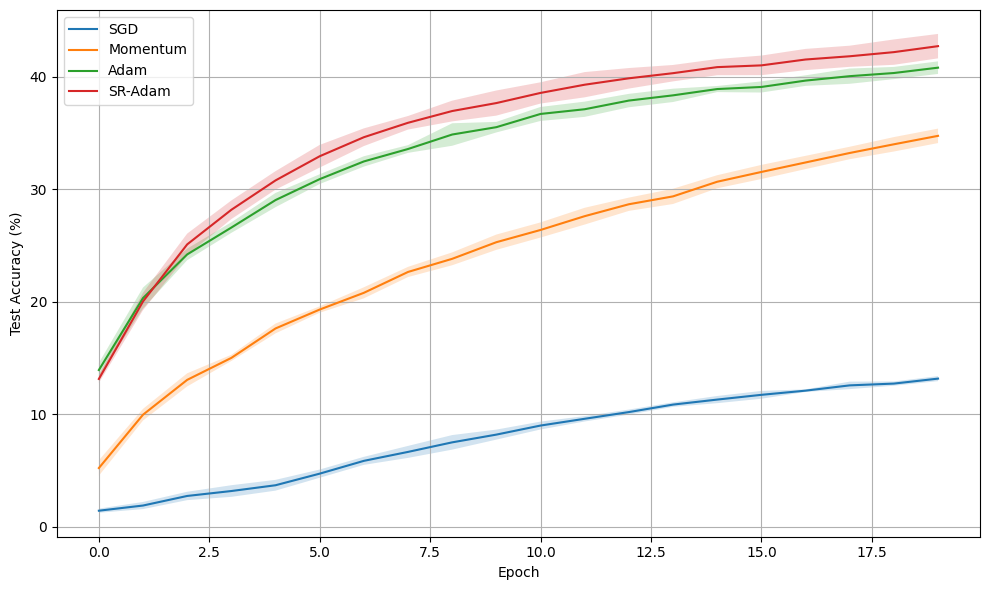

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.0

=== Dataset: CIFAR100 | Noise: 0.05 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 1/20 | Train Loss: 4.6033 | Train Acc: 1.14% | Test Loss: 4.5966 | Test Acc: 1.22% | Time: 35.82s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 10/20 | Train Loss: 4.2117 | Train Acc: 5.98% | Test Loss: 4.1190 | Test Acc: 7.66% | Time: 35.63s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 3.8844 | Train Acc: 10.68% | Test Loss: 3.7689 | Test Acc: 13.28% | Time: 35.91s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 1/20 | Train Loss: 4.6026 | Train Acc: 1.13% | Test Loss: 4.5963 | Test Acc: 1.36% | Time: 35.60s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 10/20 | Train Loss: 4.2227 | Train Acc: 6.47% | Test Loss: 4.1165 | Test Acc: 8.57% | Time: 35.89s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 20/20 | Train Loss: 3.9211 | Train Acc: 10.43% | Test Loss: 3.8047 | Test Acc: 12.57% | Time: 35.48s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 1/20 | Train Loss: 4.6024 | Train Acc: 1.22% | Test Loss: 4.5954 | Test Acc: 1.71% | Time: 34.96s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 10/20 | Train Loss: 4.2301 | Train Acc: 6.20% | Test Loss: 4.1323 | Test Acc: 7.61% | Time: 35.31s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 20/20 | Train Loss: 3.8931 | Train Acc: 10.65% | Test Loss: 3.7751 | Test Acc: 13.85% | Time: 34.97s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]


Epoch 1/20 | Train Loss: 4.6034 | Train Acc: 0.97% | Test Loss: 4.5961 | Test Acc: 1.12% | Time: 34.69s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 10/20 | Train Loss: 4.2253 | Train Acc: 6.18% | Test Loss: 4.1087 | Test Acc: 8.05% | Time: 35.35s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 20/20 | Train Loss: 3.9137 | Train Acc: 10.28% | Test Loss: 3.7930 | Test Acc: 12.88% | Time: 35.66s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]


Epoch 1/20 | Train Loss: 4.6013 | Train Acc: 1.27% | Test Loss: 4.5939 | Test Acc: 1.61% | Time: 34.62s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 10/20 | Train Loss: 4.1904 | Train Acc: 6.35% | Test Loss: 4.0800 | Test Acc: 8.73% | Time: 35.34s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 20/20 | Train Loss: 3.8905 | Train Acc: 10.88% | Test Loss: 3.7758 | Test Acc: 13.42% | Time: 35.28s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\SGD\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\SGD\runs_and_aggregate.xlsx

Optimizer: Momentum

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]


Epoch 1/20 | Train Loss: 4.5514 | Train Acc: 2.09% | Test Loss: 4.3640 | Test Acc: 5.03% | Time: 37.47s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 10/20 | Train Loss: 3.2569 | Train Acc: 20.94% | Test Loss: 3.0611 | Test Acc: 25.63% | Time: 35.59s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 20/20 | Train Loss: 2.8411 | Train Acc: 28.66% | Test Loss: 2.5808 | Test Acc: 34.96% | Time: 36.95s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 1/20 | Train Loss: 4.5498 | Train Acc: 2.29% | Test Loss: 4.3778 | Test Acc: 4.87% | Time: 37.11s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 10/20 | Train Loss: 3.2947 | Train Acc: 20.19% | Test Loss: 3.1147 | Test Acc: 24.29% | Time: 35.74s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 20/20 | Train Loss: 2.8944 | Train Acc: 27.61% | Test Loss: 2.6312 | Test Acc: 33.42% | Time: 35.83s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 1/20 | Train Loss: 4.5491 | Train Acc: 2.28% | Test Loss: 4.3800 | Test Acc: 4.73% | Time: 35.98s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 10/20 | Train Loss: 3.2630 | Train Acc: 20.74% | Test Loss: 3.0808 | Test Acc: 25.00% | Time: 35.56s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 20/20 | Train Loss: 2.8147 | Train Acc: 28.99% | Test Loss: 2.5730 | Test Acc: 34.99% | Time: 35.28s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 1/20 | Train Loss: 4.5588 | Train Acc: 2.16% | Test Loss: 4.4066 | Test Acc: 5.77% | Time: 35.33s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 10/20 | Train Loss: 3.2499 | Train Acc: 21.13% | Test Loss: 3.0682 | Test Acc: 25.40% | Time: 35.72s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 20/20 | Train Loss: 2.8476 | Train Acc: 28.50% | Test Loss: 2.5749 | Test Acc: 34.47% | Time: 35.94s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 1/20 | Train Loss: 4.5330 | Train Acc: 2.55% | Test Loss: 4.2986 | Test Acc: 5.89% | Time: 35.54s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 10/20 | Train Loss: 3.2293 | Train Acc: 21.54% | Test Loss: 3.0204 | Test Acc: 25.98% | Time: 34.95s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 20/20 | Train Loss: 2.8326 | Train Acc: 28.90% | Test Loss: 2.5625 | Test Acc: 35.32% | Time: 35.74s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\Momentum\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\Momentum\runs_and_aggregate.xlsx

Optimizer: Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 1/20 | Train Loss: 4.1969 | Train Acc: 6.09% | Test Loss: 3.7319 | Test Acc: 13.71% | Time: 35.79s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 10/20 | Train Loss: 2.8296 | Train Acc: 28.68% | Test Loss: 2.5274 | Test Acc: 35.75% | Time: 34.98s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 20/20 | Train Loss: 2.5820 | Train Acc: 33.68% | Test Loss: 2.3231 | Test Acc: 39.78% | Time: 36.35s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 1/20 | Train Loss: 4.1780 | Train Acc: 6.73% | Test Loss: 3.7044 | Test Acc: 14.49% | Time: 35.74s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 10/20 | Train Loss: 2.8630 | Train Acc: 28.21% | Test Loss: 2.5908 | Test Acc: 34.67% | Time: 34.93s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 20/20 | Train Loss: 2.5866 | Train Acc: 33.76% | Test Loss: 2.3111 | Test Acc: 39.98% | Time: 36.24s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 1/20 | Train Loss: 4.1817 | Train Acc: 6.64% | Test Loss: 3.7090 | Test Acc: 14.29% | Time: 35.61s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 10/20 | Train Loss: 2.8096 | Train Acc: 29.21% | Test Loss: 2.5431 | Test Acc: 35.74% | Time: 36.90s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 2.5541 | Train Acc: 34.17% | Test Loss: 2.2873 | Test Acc: 40.77% | Time: 35.76s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 1/20 | Train Loss: 4.1878 | Train Acc: 6.44% | Test Loss: 3.7145 | Test Acc: 14.31% | Time: 35.69s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]


Epoch 10/20 | Train Loss: 2.8467 | Train Acc: 28.49% | Test Loss: 2.5808 | Test Acc: 34.46% | Time: 36.97s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 20/20 | Train Loss: 2.6015 | Train Acc: 33.42% | Test Loss: 2.3340 | Test Acc: 39.42% | Time: 35.83s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 1/20 | Train Loss: 4.1580 | Train Acc: 6.99% | Test Loss: 3.7069 | Test Acc: 13.92% | Time: 35.67s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 10/20 | Train Loss: 2.7961 | Train Acc: 29.75% | Test Loss: 2.4965 | Test Acc: 36.37% | Time: 35.95s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 20/20 | Train Loss: 2.5283 | Train Acc: 34.96% | Test Loss: 2.2949 | Test Acc: 41.01% | Time: 35.46s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\Adam\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 1/20 | Train Loss: 4.2134 | Train Acc: 5.89% | Test Loss: 3.7631 | Test Acc: 13.06% | Time: 36.00s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 10/20 | Train Loss: 2.7007 | Train Acc: 31.24% | Test Loss: 2.4299 | Test Acc: 37.61% | Time: 36.23s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 20/20 | Train Loss: 2.4595 | Train Acc: 36.03% | Test Loss: 2.1988 | Test Acc: 42.50% | Time: 35.89s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 1/20 | Train Loss: 4.2251 | Train Acc: 5.99% | Test Loss: 3.7709 | Test Acc: 12.87% | Time: 35.27s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 10/20 | Train Loss: 2.7970 | Train Acc: 29.29% | Test Loss: 2.5200 | Test Acc: 34.93% | Time: 36.75s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 20/20 | Train Loss: 2.5583 | Train Acc: 34.17% | Test Loss: 2.2991 | Test Acc: 40.07% | Time: 35.97s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 1/20 | Train Loss: 4.2109 | Train Acc: 6.29% | Test Loss: 3.7385 | Test Acc: 13.76% | Time: 36.30s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 10/20 | Train Loss: 2.7224 | Train Acc: 30.66% | Test Loss: 2.4328 | Test Acc: 37.44% | Time: 36.70s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 20/20 | Train Loss: 2.4858 | Train Acc: 35.46% | Test Loss: 2.2348 | Test Acc: 40.98% | Time: 36.60s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]


Epoch 1/20 | Train Loss: 4.2204 | Train Acc: 6.06% | Test Loss: 3.7363 | Test Acc: 13.52% | Time: 37.86s


Epoch 10/20: 100%|██████████| 98/98 [00:36<00:00,  2.71it/s]


Epoch 10/20 | Train Loss: 2.7823 | Train Acc: 29.54% | Test Loss: 2.4795 | Test Acc: 36.43% | Time: 39.69s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.88it/s]


Epoch 20/20 | Train Loss: 2.5311 | Train Acc: 34.74% | Test Loss: 2.2757 | Test Acc: 40.65% | Time: 37.22s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:36<00:00,  2.68it/s]


Epoch 1/20 | Train Loss: 4.1826 | Train Acc: 6.54% | Test Loss: 3.7303 | Test Acc: 13.44% | Time: 40.11s


Epoch 10/20: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]


Epoch 10/20 | Train Loss: 2.6509 | Train Acc: 32.42% | Test Loss: 2.3775 | Test Acc: 38.77% | Time: 37.89s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]


Epoch 20/20 | Train Loss: 2.3887 | Train Acc: 37.75% | Test Loss: 2.1534 | Test Acc: 43.29% | Time: 37.54s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.05\SR-Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.05\SR-Adam\runs_and_aggregate.xlsx


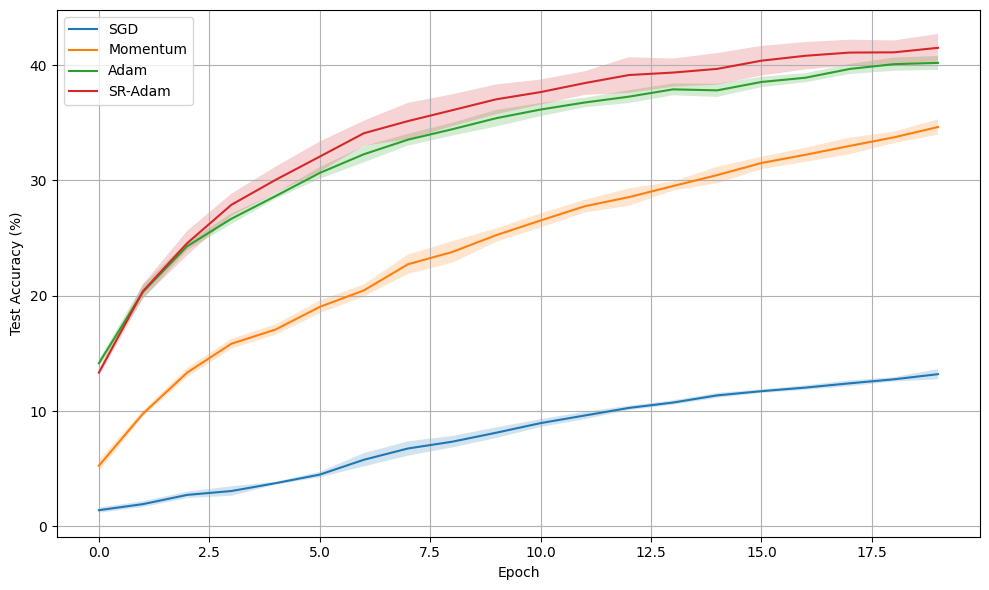

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.05

=== Dataset: CIFAR100 | Noise: 0.1 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: SGD

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.88it/s]


Epoch 1/20 | Train Loss: 4.6032 | Train Acc: 1.13% | Test Loss: 4.5964 | Test Acc: 1.32% | Time: 37.33s


Epoch 10/20: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]


Epoch 10/20 | Train Loss: 4.2078 | Train Acc: 6.02% | Test Loss: 4.1155 | Test Acc: 7.75% | Time: 38.68s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 20/20 | Train Loss: 3.8845 | Train Acc: 10.63% | Test Loss: 3.7671 | Test Acc: 13.25% | Time: 37.17s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 1/20 | Train Loss: 4.6024 | Train Acc: 1.16% | Test Loss: 4.5963 | Test Acc: 1.31% | Time: 37.25s


Epoch 10/20: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]


Epoch 10/20 | Train Loss: 4.2170 | Train Acc: 6.49% | Test Loss: 4.1121 | Test Acc: 8.62% | Time: 38.72s


Epoch 20/20: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]


Epoch 20/20 | Train Loss: 3.9207 | Train Acc: 10.38% | Test Loss: 3.8040 | Test Acc: 12.72% | Time: 38.73s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]


Epoch 1/20 | Train Loss: 4.6023 | Train Acc: 1.19% | Test Loss: 4.5953 | Test Acc: 1.69% | Time: 40.70s


Epoch 10/20: 100%|██████████| 98/98 [00:35<00:00,  2.73it/s]


Epoch 10/20 | Train Loss: 4.2287 | Train Acc: 6.17% | Test Loss: 4.1321 | Test Acc: 7.70% | Time: 39.43s


Epoch 20/20: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]


Epoch 20/20 | Train Loss: 3.8964 | Train Acc: 10.66% | Test Loss: 3.7774 | Test Acc: 13.83% | Time: 41.57s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 1/20 | Train Loss: 4.6033 | Train Acc: 0.97% | Test Loss: 4.5959 | Test Acc: 1.11% | Time: 36.77s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 10/20 | Train Loss: 4.2218 | Train Acc: 6.18% | Test Loss: 4.1067 | Test Acc: 8.08% | Time: 35.72s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]


Epoch 20/20 | Train Loss: 3.9150 | Train Acc: 10.22% | Test Loss: 3.7942 | Test Acc: 12.90% | Time: 36.34s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 1/20 | Train Loss: 4.6012 | Train Acc: 1.28% | Test Loss: 4.5937 | Test Acc: 1.59% | Time: 35.85s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.97it/s]


Epoch 10/20 | Train Loss: 4.1865 | Train Acc: 6.38% | Test Loss: 4.0774 | Test Acc: 8.79% | Time: 36.39s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 3.8917 | Train Acc: 10.82% | Test Loss: 3.7748 | Test Acc: 13.46% | Time: 35.73s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\SGD\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\SGD\runs_and_aggregate.xlsx

Optimizer: Momentum

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 1/20 | Train Loss: 4.5499 | Train Acc: 2.15% | Test Loss: 4.3585 | Test Acc: 4.73% | Time: 35.93s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 10/20 | Train Loss: 3.2700 | Train Acc: 20.74% | Test Loss: 3.0747 | Test Acc: 25.38% | Time: 35.85s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 2.8583 | Train Acc: 28.48% | Test Loss: 2.5868 | Test Acc: 34.44% | Time: 35.79s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 1/20 | Train Loss: 4.5484 | Train Acc: 2.33% | Test Loss: 4.3724 | Test Acc: 4.84% | Time: 35.86s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 10/20 | Train Loss: 3.2977 | Train Acc: 20.13% | Test Loss: 3.1109 | Test Acc: 24.75% | Time: 35.18s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 2.9035 | Train Acc: 27.57% | Test Loss: 2.6449 | Test Acc: 33.20% | Time: 35.84s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 1/20 | Train Loss: 4.5485 | Train Acc: 2.34% | Test Loss: 4.3797 | Test Acc: 4.85% | Time: 36.06s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 10/20 | Train Loss: 3.2793 | Train Acc: 20.46% | Test Loss: 3.0904 | Test Acc: 25.47% | Time: 35.20s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 20/20 | Train Loss: 2.8436 | Train Acc: 28.65% | Test Loss: 2.5923 | Test Acc: 34.61% | Time: 35.74s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 1/20 | Train Loss: 4.5584 | Train Acc: 2.15% | Test Loss: 4.4042 | Test Acc: 5.32% | Time: 35.89s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 10/20 | Train Loss: 3.2498 | Train Acc: 21.26% | Test Loss: 3.0716 | Test Acc: 25.58% | Time: 36.06s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]


Epoch 20/20 | Train Loss: 2.8521 | Train Acc: 28.47% | Test Loss: 2.5795 | Test Acc: 34.52% | Time: 37.60s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.88it/s]


Epoch 1/20 | Train Loss: 4.5328 | Train Acc: 2.55% | Test Loss: 4.2993 | Test Acc: 6.19% | Time: 37.35s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]


Epoch 10/20 | Train Loss: 3.2378 | Train Acc: 21.39% | Test Loss: 3.0146 | Test Acc: 26.43% | Time: 36.93s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]


Epoch 20/20 | Train Loss: 2.8429 | Train Acc: 28.81% | Test Loss: 2.5703 | Test Acc: 35.12% | Time: 38.34s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\Momentum\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\Momentum\runs_and_aggregate.xlsx

Optimizer: Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]


Epoch 1/20 | Train Loss: 4.2029 | Train Acc: 5.95% | Test Loss: 3.7610 | Test Acc: 13.77% | Time: 37.58s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 10/20 | Train Loss: 2.8910 | Train Acc: 27.67% | Test Loss: 2.6437 | Test Acc: 33.00% | Time: 36.70s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 20/20 | Train Loss: 2.6208 | Train Acc: 32.92% | Test Loss: 2.3712 | Test Acc: 39.00% | Time: 37.09s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]


Epoch 1/20 | Train Loss: 4.1818 | Train Acc: 6.74% | Test Loss: 3.7220 | Test Acc: 13.55% | Time: 37.20s


Epoch 10/20: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]


Epoch 10/20 | Train Loss: 2.9262 | Train Acc: 27.01% | Test Loss: 2.6513 | Test Acc: 33.66% | Time: 38.55s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.80it/s]


Epoch 20/20 | Train Loss: 2.6614 | Train Acc: 32.14% | Test Loss: 2.3805 | Test Acc: 38.54% | Time: 38.43s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:35<00:00,  2.76it/s]


Epoch 1/20 | Train Loss: 4.1803 | Train Acc: 6.61% | Test Loss: 3.7162 | Test Acc: 14.17% | Time: 39.07s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 10/20 | Train Loss: 2.8530 | Train Acc: 28.31% | Test Loss: 2.6057 | Test Acc: 34.14% | Time: 36.08s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]


Epoch 20/20 | Train Loss: 2.6078 | Train Acc: 33.23% | Test Loss: 2.3641 | Test Acc: 38.89% | Time: 37.46s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]


Epoch 1/20 | Train Loss: 4.1957 | Train Acc: 6.30% | Test Loss: 3.7132 | Test Acc: 14.18% | Time: 38.09s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 10/20 | Train Loss: 2.8470 | Train Acc: 28.65% | Test Loss: 2.5737 | Test Acc: 34.65% | Time: 36.61s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 20/20 | Train Loss: 2.6155 | Train Acc: 33.28% | Test Loss: 2.3695 | Test Acc: 38.63% | Time: 35.47s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 1/20 | Train Loss: 4.1764 | Train Acc: 6.50% | Test Loss: 3.7494 | Test Acc: 13.24% | Time: 35.15s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 10/20 | Train Loss: 2.8476 | Train Acc: 28.66% | Test Loss: 2.5464 | Test Acc: 35.29% | Time: 36.06s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 20/20 | Train Loss: 2.5944 | Train Acc: 33.60% | Test Loss: 2.3410 | Test Acc: 40.06% | Time: 35.83s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\Adam\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/5 | seed = 42
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 1/20 | Train Loss: 4.2204 | Train Acc: 5.72% | Test Loss: 3.7836 | Test Acc: 13.34% | Time: 37.02s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 10/20 | Train Loss: 2.7464 | Train Acc: 30.20% | Test Loss: 2.4595 | Test Acc: 36.69% | Time: 36.78s


Epoch 20/20: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]


Epoch 20/20 | Train Loss: 2.5307 | Train Acc: 34.85% | Test Loss: 2.3522 | Test Acc: 39.63% | Time: 38.07s

Run 2/5 | seed = 43
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]


Epoch 1/20 | Train Loss: 4.2193 | Train Acc: 6.13% | Test Loss: 3.7729 | Test Acc: 13.06% | Time: 37.92s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]


Epoch 10/20 | Train Loss: 2.8135 | Train Acc: 28.99% | Test Loss: 2.5350 | Test Acc: 34.79% | Time: 37.01s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 20/20 | Train Loss: 2.5649 | Train Acc: 33.79% | Test Loss: 2.3339 | Test Acc: 39.79% | Time: 36.82s

Run 3/5 | seed = 44
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 1/20 | Train Loss: 4.2040 | Train Acc: 6.31% | Test Loss: 3.7326 | Test Acc: 13.88% | Time: 36.62s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 10/20 | Train Loss: 2.7681 | Train Acc: 29.94% | Test Loss: 2.4981 | Test Acc: 35.85% | Time: 36.65s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 20/20 | Train Loss: 2.5257 | Train Acc: 34.54% | Test Loss: 2.3082 | Test Acc: 39.75% | Time: 36.74s

Run 4/5 | seed = 45
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]


Epoch 1/20 | Train Loss: 4.2258 | Train Acc: 5.92% | Test Loss: 3.7677 | Test Acc: 12.45% | Time: 36.51s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 10/20 | Train Loss: 2.7838 | Train Acc: 29.40% | Test Loss: 2.5050 | Test Acc: 36.37% | Time: 36.78s


Epoch 20/20: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]


Epoch 20/20 | Train Loss: 2.5613 | Train Acc: 34.17% | Test Loss: 2.3177 | Test Acc: 40.20% | Time: 36.48s

Run 5/5 | seed = 46
Model params: 556,708


Epoch 1/20: 100%|██████████| 98/98 [00:36<00:00,  2.72it/s]


Epoch 1/20 | Train Loss: 4.1938 | Train Acc: 6.33% | Test Loss: 3.7682 | Test Acc: 12.93% | Time: 39.49s


Epoch 10/20: 100%|██████████| 98/98 [00:29<00:00,  3.38it/s]


Epoch 10/20 | Train Loss: 2.7162 | Train Acc: 30.98% | Test Loss: 2.4720 | Test Acc: 36.43% | Time: 31.97s


Epoch 20/20: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]


Epoch 20/20 | Train Loss: 2.4768 | Train Acc: 35.62% | Test Loss: 2.2854 | Test Acc: 41.01% | Time: 32.53s
Aggregated results saved: results\CIFAR100\simplecnn\noise_0.1\SR-Adam\aggregated_summary.json, results\CIFAR100\simplecnn\noise_0.1\SR-Adam\runs_and_aggregate.xlsx


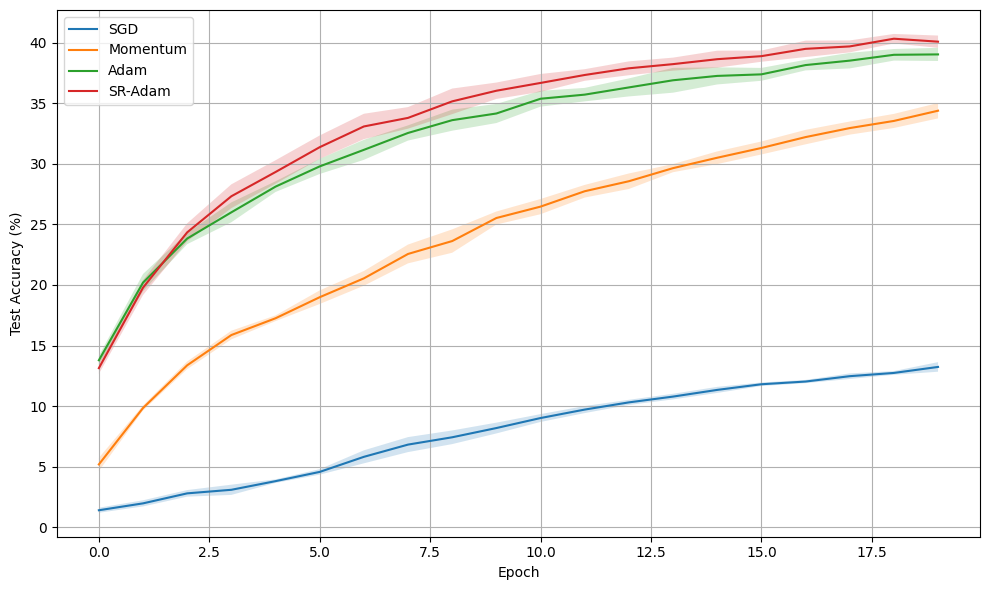

Saved epoch mean/std plot to results\CIFAR100\simplecnn\noise_0.1
Multi-run summary saved to results\summary_statistics.csv

FINAL GRID SUMMARY (mean ± std over runs)
CIFAR100|noise_0.0|SGD: 13.17 ± 0.22 (best: 13.17 ± 0.22)

Noise summary for CIFAR100|simplecnn:
  Optimizer: SGD
    noise=0.0: 13.17 ± 0.22
    noise=0.05: 13.20 ± 0.44
    noise=0.1: 13.23 ± 0.40
  Optimizer: Momentum
    noise=0.0: 34.76 ± 0.64
    noise=0.05: 34.63 ± 0.66
    noise=0.1: 34.38 ± 0.63
  Optimizer: Adam
    noise=0.0: 40.82 ± 0.56
    noise=0.05: 40.19 ± 0.60
    noise=0.1: 39.02 ± 0.54
  Optimizer: SR-Adam
    noise=0.0: 42.74 ± 1.09
    noise=0.05: 41.50 ± 1.20
    noise=0.1: 40.08 ± 0.50
CIFAR100|noise_0.0|Momentum: 34.76 ± 0.64 (best: 34.77 ± 0.65)
CIFAR100|noise_0.0|Adam: 40.82 ± 0.56 (best: 40.85 ± 0.55)
CIFAR100|noise_0.0|SR-Adam: 42.74 ± 1.09 (best: 42.74 ± 1.09)
CIFAR100|noise_0.05|SGD: 13.20 ± 0.44 (best: 13.20 ± 0.44)
CIFAR100|noise_0.05|Momentum: 34.63 ± 0.66 (best: 34.63 ± 0.66)
CIFAR100|no

In [1]:
%run main.py --dataset CIFAR100 --model simplecnn --optimizers ALL --num_epochs 20 --num_runs 5 --batch_size 512

# CIFAR10

In [ ]:
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.05 \
  --optimizers "adam|sradam"

In [ ]:
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam"

In [ ]:
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.2 \
  --optimizers "adam|sradam"

# CIFAR100

## SimpleCNN Experiments

In [ ]:
# Comparison: SimpleCNN vs ResNet-18 on CIFAR-100
# First run SimpleCNN baseline
%run main.py \
  --dataset CIFAR100 \
  --model simplecnn \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.0 \
  --optimizers "adam|sradam"

## ResNet-18 Experiments

Testing ResNet-18 on CIFAR-100 (much larger model, ~11M parameters vs ~250K for SimpleCNN)

In [ ]:
# CIFAR-100 with ResNet-18 (no noise, 20 epochs)
%run main.py \
  --dataset CIFAR100 \
  --model resnet18 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 3 \
  --noise 0.0 \
  --optimizers "adam|sradam"

In [ ]:
%run main.py \
  --dataset CIFAR100 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 3 \
  --noise 0.05 \
  --optimizers "adam|sradam"

In [ ]:
%run main.py \
  --dataset CIFAR100 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 3 \
  --noise 0.1 \
  --optimizers "adam|sradam"